In [10]:
import pandas as pd
import seaborn as sns
import re
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt

# Load the Tweets.csv file

In [11]:
tweets_df = pd.read_csv('Tweets.csv')

tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Count the number of tweets for each sentiment

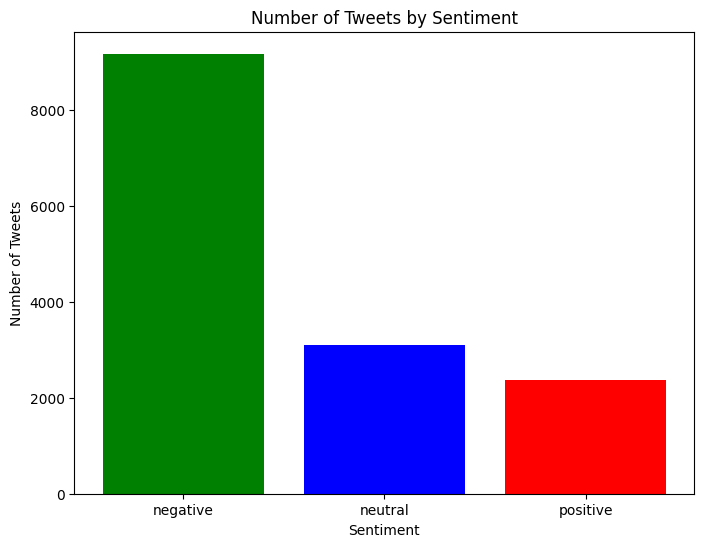

In [12]:
sentiment_counts = tweets_df['airline_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title('Number of Tweets by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [13]:
# Create a count plot of the airline sentiment

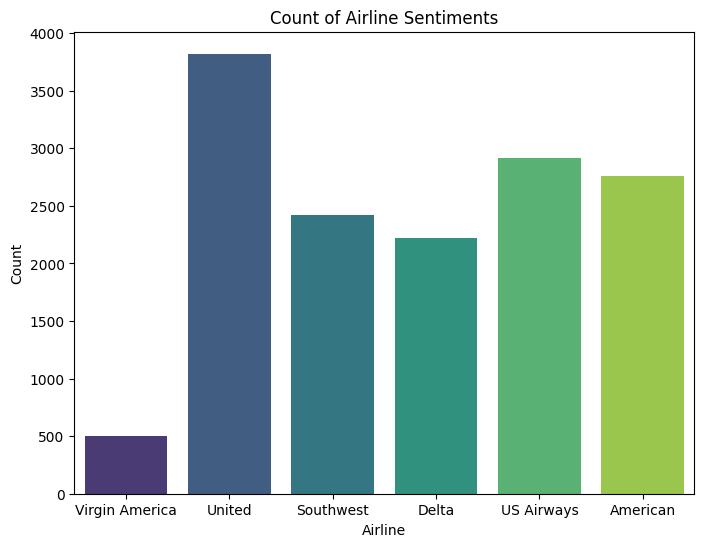

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=tweets_df, x='airline', palette='viridis')
plt.title('Count of Airline Sentiments')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

# Create a count plot of the airline sentiment

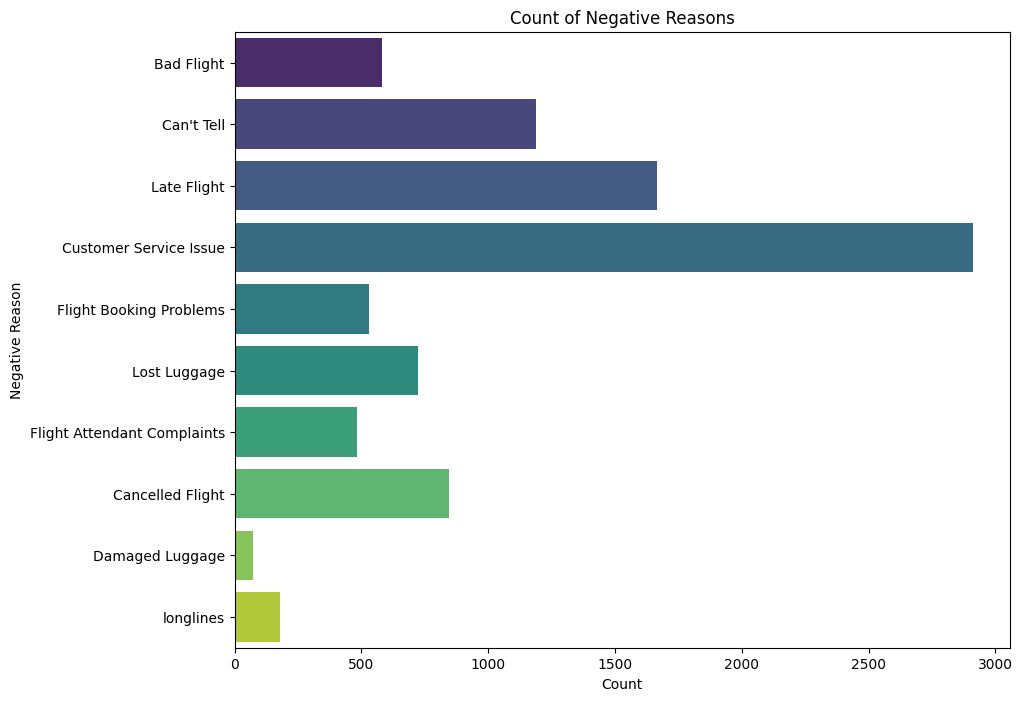

In [15]:
plt.figure(figsize=(10, 8))
sns.countplot(data=tweets_df, y='negativereason', palette='viridis')
plt.title('Count of Negative Reasons')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()


# Create a count plot of the user timezones

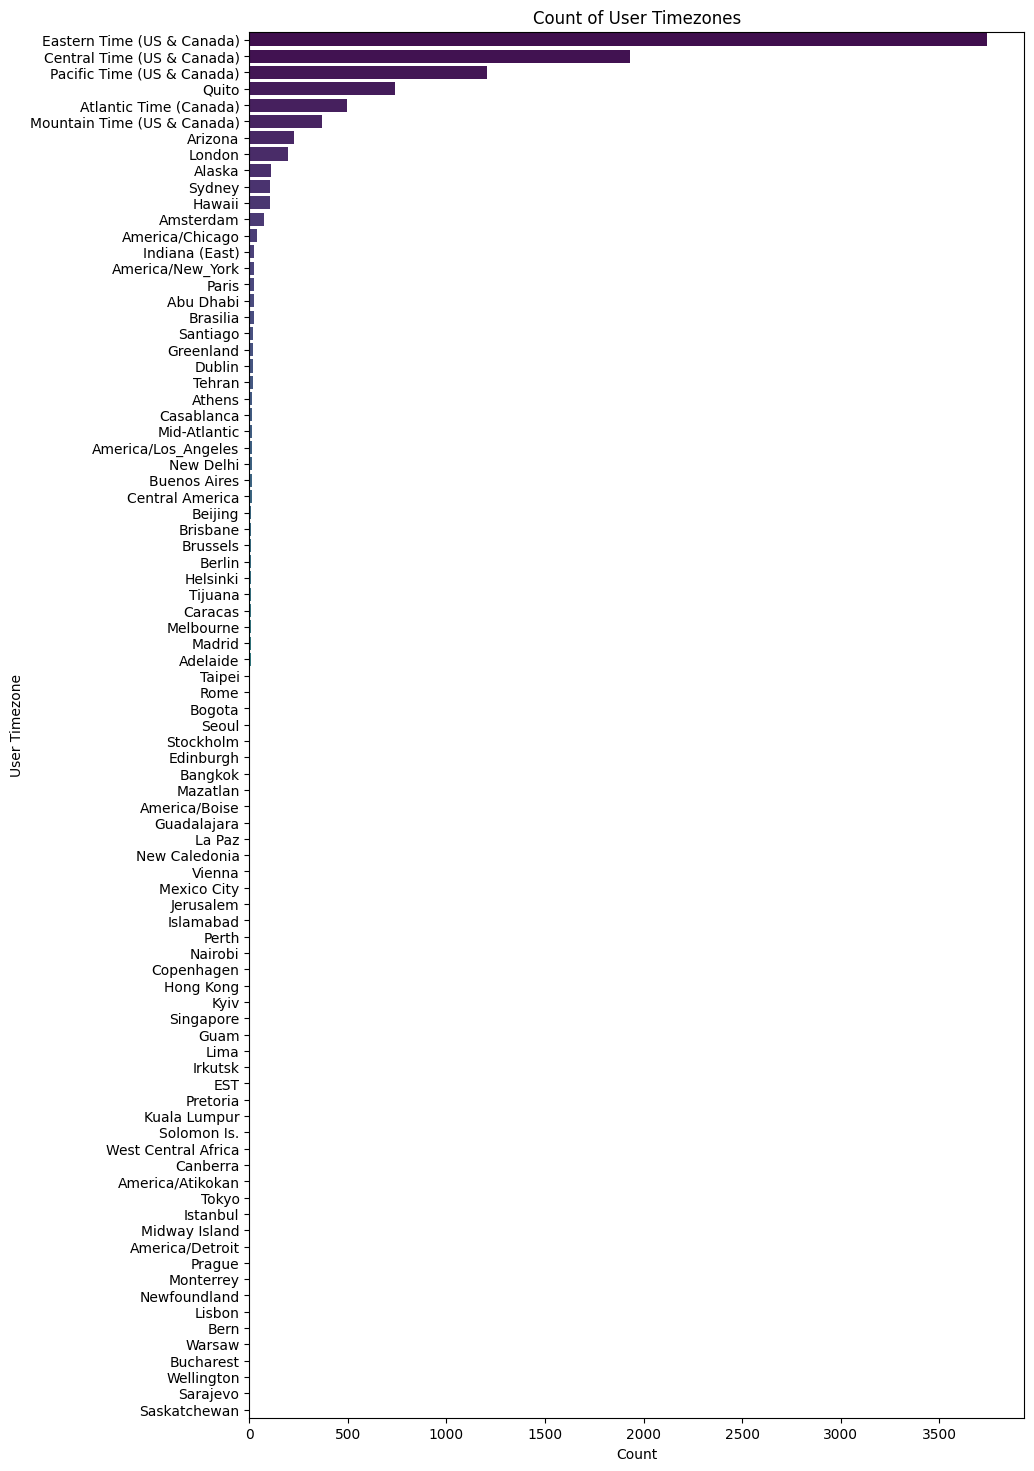

In [16]:
plt.figure(figsize=(10, 18))
sns.countplot(data=tweets_df, y='user_timezone', palette='viridis', order=tweets_df['user_timezone'].value_counts().index)
plt.title('Count of User Timezones')
plt.xlabel('Count')
plt.ylabel('User Timezone')
plt.show()

# Create a count plot of the airline sentiment

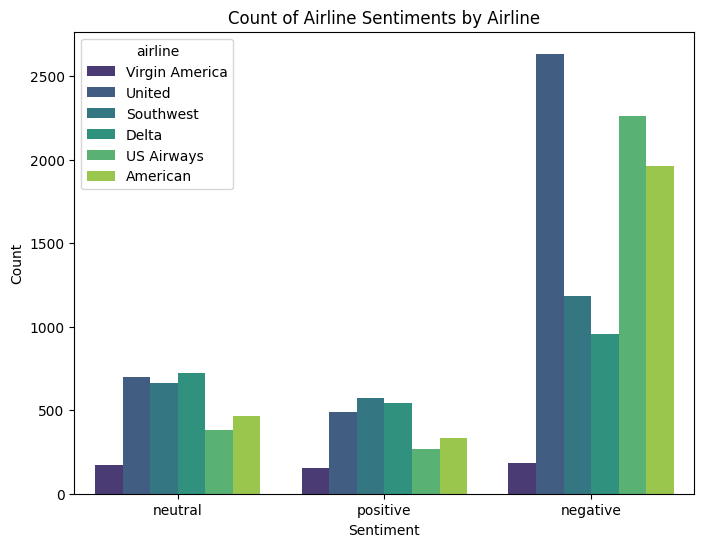

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=tweets_df, x='airline_sentiment', hue='airline', palette='viridis')
plt.title('Count of Airline Sentiments by Airline')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Create a count plot of the retweet count by sentiment

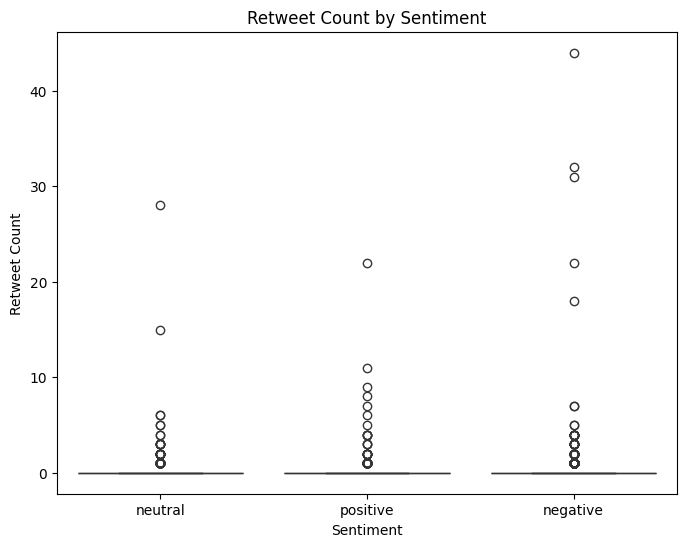

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=tweets_df, x='airline_sentiment', y='retweet_count', palette='viridis')
plt.title('Retweet Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Retweet Count')
plt.show()


# Create a count plot of the tweet locations

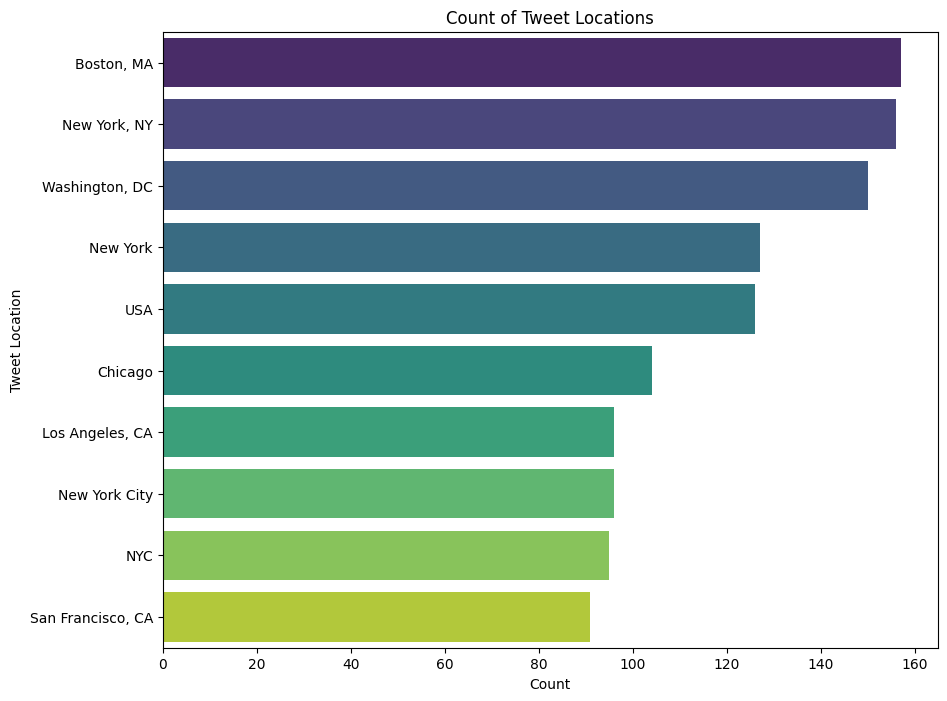

In [19]:
plt.figure(figsize=(10, 8))
sns.countplot(data=tweets_df, y='tweet_location', palette='viridis', order=tweets_df['tweet_location'].value_counts().iloc[:10].index)
plt.title('Count of Tweet Locations')
plt.xlabel('Count')
plt.ylabel('Tweet Location')
plt.show()

# Check for missing values

In [20]:
missing_values = tweets_df.isnull().sum()
missing_values

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Steps to Perform
1. Drop columns that are not necessary for sentiment analysis, such as 'tweet_id', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_created', 'tweet_location', and 'user_timezone'.
2. For 'negativereason' and 'negativereason_confidence', we can fill missing values with 'None' or a placeholder value since these are only applicable to negative sentiments.
3. Convert the 'text' column to lowercase, remove any special characters, tokenization the text,Remove stopwords and Lemmatization.

In [22]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Drop unnecessary columns
unnecessary_columns = ['tweet_id', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']
tweets_df_cleaned = tweets_df.drop(columns=unnecessary_columns)

# Fill missing values for 'negativereason' and 'negativereason_confidence'
tweets_df_cleaned['negativereason'].fillna('None', inplace=True)
tweets_df_cleaned['negativereason_confidence'].fillna(0, inplace=True)

# Convert text to lowercase and remove special characters
tweets_df_cleaned['text'] = tweets_df_cleaned['text'].str.lower()
tweets_df_cleaned['text'] = tweets_df_cleaned['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Tokenization
tweets_df_cleaned['text'] = tweets_df_cleaned['text'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
tweets_df_cleaned['text'] = tweets_df_cleaned['text'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
tweets_df_cleaned['text'] = tweets_df_cleaned['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join the tokenized words back into a single string
tweets_df_cleaned['text'] = tweets_df_cleaned['text'].apply(lambda x: ' '.join(x))


# Display the cleaned dataframe
tweets_df_cleaned.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mramk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mramk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mramk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text
0,neutral,1.0000,None,0.0000,Virgin America,cairdin,0,virginamerica dhepburn said
1,positive,0.3486,None,0.0000,Virgin America,jnardino,0,virginamerica plus youve added commercial expe...
2,neutral,0.6837,None,0.0000,Virgin America,yvonnalynn,0,virginamerica didnt today must mean need take ...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,virginamerica really aggressive blast obnoxiou...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,virginamerica really big bad thing


In [23]:
tweets_df_cleaned.to_csv('cleaned_data')